# Inteligência Artificial: Classificação
## ASSESSMENT – AT

### Questão 1, Carregar os Dados
Vamos trabalhar com uma base que contém dados relacionados a diamantes, com 53.940 observações e 10 variáveis. A variável alvo será a 'cut' e utilizaremos as demais como variáveis explicativas. Abaixo temos a descrição de cada uma das variáveis desta base:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- color: diamond colour, from D (best) to J (worst)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm (0--10.74)
- y: width in mm (0--58.9)
- z: depth in mm (0--31.8)
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)
- cut (Target): quality of the cut (Fair, Good, Very Good, Premium, Ideal)
Você deverá utilizar a linguagem Python para a execução de todas as tarefas abaixo. Inicie carregando a base que está no link a seguir diretamente do Github e armazenando os dados em um data frame único (lembre-se de inspecionar o arquivo para utilizar a instrução de importação de forma que funcione corretamente). Ao terminar, apresente a base.


In [1]:
import pandas as pd

# Carregando a base de dados em um DataFrame único
diamonds = pd.read_csv("https://raw.githubusercontent.com/cassiusf/datasets/main/diamonds.csv")

# Apresentando a base de dados
print("Dataframe:")
print(diamonds.head())

# Selecionando a variável alvo
target_column = "cut"
target = diamonds[target_column]

# Apresentando a variável alvo
print("\nVariável alvo:")
print(target.head())


Dataframe:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
3   0.23    Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
4   0.22  Premium     F     SI1   60.4   61.0    342  3.88  3.84  2.33

Variável alvo:
0      Ideal
1    Premium
2    Premium
3      Ideal
4    Premium
Name: cut, dtype: object


### Questão 2, Preparar os Dados
Após o carregamento, execute as seguintes operações, na ordem apresentada:
1.	Transforme as variáveis 'clarity' e 'color' em variáveis dummy e remova as variáveis originais da base.
2.	Apresente em uma visualização única a distribuição de valores da variável-alvo.
3.	Recodifique a variável alvo, utilizando e referência a seguir:
- (0) 'Ideal'
- (1) 'Premium'
- (3) 'Very Good'
- (4) 'Good'
- (5) 'Fair'
4.	Separe o conjunto das variáveis independentes da variável dependente.
5.	Aplique um escalonamento à sua escolha no conjunto de dados, aplicando a técnica apropriada.
6.	Separe os dados resultantes em bases de Treino e Teste, utilizando a proporção 75-25%.


Variáveis explicativas:
   carat      cut  depth  table  price     x     y     z  clarity_IF  \
0   0.23    Ideal   61.5   55.0    326  3.95  3.98  2.43       False   
1   0.21  Premium   59.8   61.0    326  3.89  3.84  2.31       False   
2   0.29  Premium   62.4   58.0    334  4.20  4.23  2.63       False   
3   0.23    Ideal   62.8   56.0    340  3.93  3.90  2.46       False   
4   0.22  Premium   60.4   61.0    342  3.88  3.84  2.33       False   

   clarity_SI1  ...  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  \
0        False  ...        False        False         False         False   
1         True  ...        False        False         False         False   
2        False  ...        False         True         False         False   
3        False  ...         True        False         False         False   
4         True  ...        False        False         False         False   

   color_E  color_F  color_G  color_H  color_I  color_J  
0     True    False   

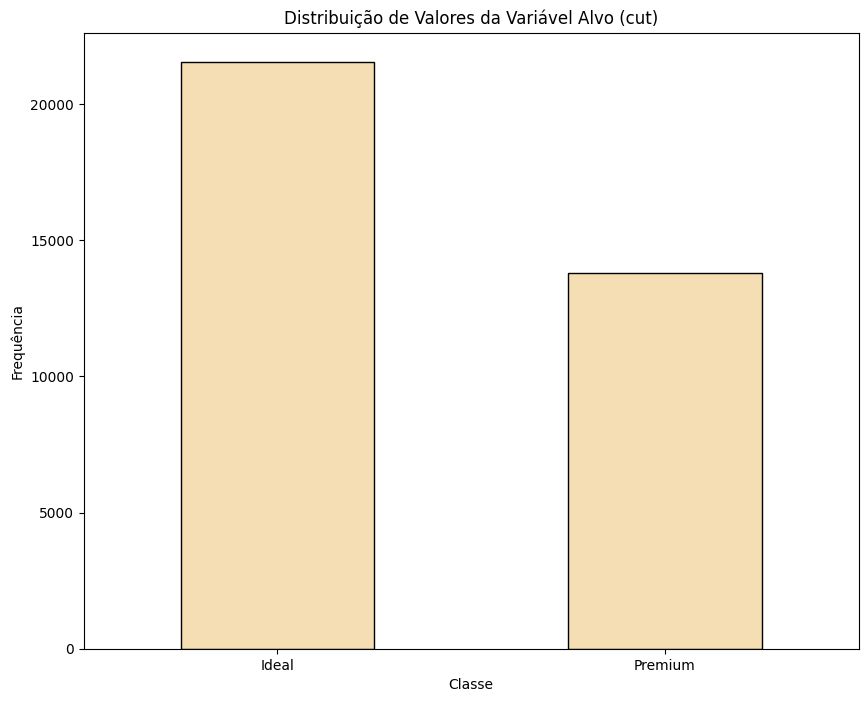

In [2]:
# Atividade 1
# Convertendo as variáveis categóricas "clarity" e "color" em variáveis dummy
diamonds = pd.get_dummies(diamonds, columns=["clarity", "color"], drop_first=True)
print("Variáveis explicativas:")
print(diamonds.head())


# Atividade 2
# Visualizando a distribuição dos valores da variável alvo
import matplotlib.pyplot as plt
distrib = target.value_counts()
plt.figure(figsize=(10, 8))
distrib.plot(kind='bar', color="wheat", edgecolor="black")
plt.title("Distribuição de Valores da Variável Alvo (cut)")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks(rotation=0)
plt.show()


# Atividade 3
# Recodificando a variável alvo
target = target.map({
    "Ideal": 0,
    "Premium": 1,
    "Very Good": 3,
    "Good": 4,
    "Fair": 5
})


# Atividade 4
# Separando as variáveis explicativas da variável alvo
features = diamonds[diamonds.columns.difference([target_column])]


# Atividade 5
# Escalonando as variáveis explicativas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)


# Atividade 6
# Separando a base de dados em treino e teste
from sklearn.model_selection import train_test_split
RANDOM_STATE = 11
TEST_SIZE = 0.25
feature_train, feature_test, target_train, target_test = train_test_split(feature_scaled, target, test_size=TEST_SIZE, random_state=RANDOM_STATE)



### Questão 3
Apresente a matriz de confusão gerada a partir da aplicação do modelo no conjunto de testes.


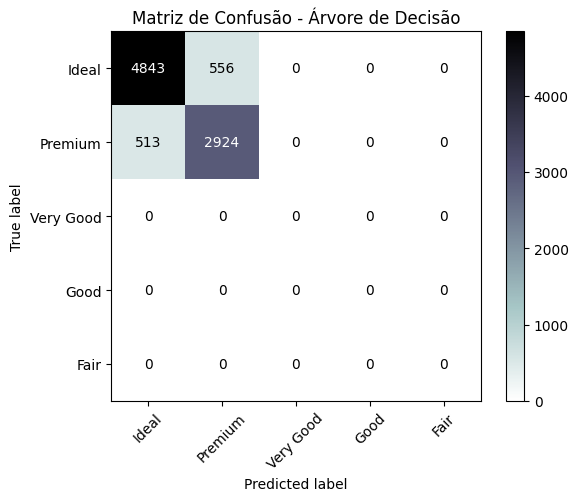

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Aplicando o modelo de Árvore de Decisão
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree.fit(feature_train, target_train)
target_pred = tree.predict(feature_test)

# Gerando a matriz de confusão
cm = confusion_matrix(target_test, target_pred, labels=[0, 1, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ideal", "Premium", "Very Good", "Good", "Fair"])
disp.plot(cmap="bone_r", xticks_rotation=45)
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

### Questão 4
Apresente o correspondente relatório de classificação com as métricas de execução da árvore de decisão.


In [4]:
# Gerando o relatório de classificação
from sklearn.metrics import classification_report, accuracy_score
print("Relatório de Classificação - Árvore de Decisão:\n")
print(classification_report(target_test, target_pred, labels=[0, 1, 3, 4, 5], target_names=["Ideal", "Premium", "Very Good", "Good", "Fair"], zero_division=0))
print(f"Acurácia do modelo de Árvore de Decisão: {accuracy_score(target_test, target_pred):.5f}")

Relatório de Classificação - Árvore de Decisão:

              precision    recall  f1-score   support

       Ideal       0.90      0.90      0.90      5399
     Premium       0.84      0.85      0.85      3437
   Very Good       0.00      0.00      0.00         0
        Good       0.00      0.00      0.00         0
        Fair       0.00      0.00      0.00         0

    accuracy                           0.88      8836
   macro avg       0.35      0.35      0.35      8836
weighted avg       0.88      0.88      0.88      8836

Acurácia do modelo de Árvore de Decisão: 0.87902


### Questão 5
Utilize os mesmos conjuntos de Treino e Teste para executar um modelo Random Forest, utilizando as opções padrão do classificador e o correspondente relatório de classificação com as métricas de execução.


In [5]:
# Aplicando o modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(feature_train, target_train)
target_pred = rf.predict(feature_test)

# Apresentando o relatório de classificação
print("Relatório de Classificação - Random Forest:\n")
print(classification_report(target_test, target_pred, labels=[0, 1, 3, 4, 5], target_names=["Ideal", "Premium", "Very Good", "Good", "Fair"], zero_division=0))
print(f"Acurácia do modelo de Random Forest: {accuracy_score(target_test, target_pred):.5f}")

Relatório de Classificação - Random Forest:

              precision    recall  f1-score   support

       Ideal       0.93      0.95      0.94      5399
     Premium       0.92      0.88      0.90      3437
   Very Good       0.00      0.00      0.00         0
        Good       0.00      0.00      0.00         0
        Fair       0.00      0.00      0.00         0

    accuracy                           0.92      8836
   macro avg       0.37      0.37      0.37      8836
weighted avg       0.92      0.92      0.92      8836

Acurácia do modelo de Random Forest: 0.92270


### Questão 6
Execute um GridSearch buscando a melhor configuração para três parâmetros da Random Forest, à sua escolha. Utilize a acurácia como métrica-alvo, justifique a escolha dos parâmetros, apresente a melhor combinação de parâmetros encontrada pelo procedimento e execute o modelo para esta melhor combinação.


In [6]:
from sklearn.model_selection import GridSearchCV

# Hiperparâmetros do Random Forest
# Os seguintes hiperparâmetros foram escolhidos para o GridSearchCV:
#   - n_estimators: número de árvores na floresta, onde mais árvores geralmente melhora o resultado da classificação
#   - max_depth: profundidade máxima das árvores, permitindo controlar o overfitting
#   - max_features: número máximo de características consideradas para dividir um nó, ajudando na diversidade das árvores
param_grid = {
    "n_estimators": [200, 400, 800],
    "max_depth": [None, 10, 20, 30],
    "max_features": ["sqrt", "log2", None]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(feature_train, target_train)

# Apresentando os parâmetros do melhor modelo encontrado
best_rf = grid_search.best_estimator_
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Executando o modelo com os melhores parâmetros
best_rf.fit(feature_train, target_train)
target_pred = best_rf.predict(feature_test)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores parâmetros encontrados:
{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 400}


### Questão 7
Apresente o relatório de classificação a partir da execução do modelo com a melhor configuração no conjunto de testes.


In [7]:
# Apresentando o relatório de classificação com o modelo otimizado
print("Relatório de Classificação - Random Forest (com os melhores parâmetros):\n")
print(classification_report(target_test, target_pred, labels=[0, 1, 3, 4, 5], target_names=["Ideal", "Premium", "Very Good", "Good", "Fair"], zero_division=0))
print(f"Acurácia do modelo de Random Forest (com os melhores parâmetros): {accuracy_score(target_test, target_pred):.5f}")


Relatório de Classificação - Random Forest (com os melhores parâmetros):

              precision    recall  f1-score   support

       Ideal       0.93      0.95      0.94      5399
     Premium       0.92      0.88      0.90      3437
   Very Good       0.00      0.00      0.00         0
        Good       0.00      0.00      0.00         0
        Fair       0.00      0.00      0.00         0

    accuracy                           0.92      8836
   macro avg       0.37      0.37      0.37      8836
weighted avg       0.92      0.92      0.92      8836

Acurácia do modelo de Random Forest (com os melhores parâmetros): 0.92270


### Questão 8
Utilize os mesmos conjuntos de Treino e Teste da questão 2 para executar um modelo XGBoost, utilizando as opções padrão do classificador e o correspondente relatório de classificação com as métricas de execução.


In [8]:
# Aplicando o modelo de XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=RANDOM_STATE)
xgb_model.fit(feature_train, target_train)
xgb_pred = xgb_model.predict(feature_test)

# Apresentando o relatório de classificação
print("Relatório de Classificação - XGBoost:\n")
print(classification_report(target_test, xgb_pred, labels=[0, 1, 3, 4, 5], target_names=["Ideal", "Premium", "Very Good", "Good", "Fair"], zero_division=0))
print(f"Acurácia do modelo de XGBoost: {accuracy_score(target_test, xgb_pred):.5f}")

Relatório de Classificação - XGBoost:

              precision    recall  f1-score   support

       Ideal       0.93      0.95      0.94      5399
     Premium       0.92      0.88      0.90      3437
   Very Good       0.00      0.00      0.00         0
        Good       0.00      0.00      0.00         0
        Fair       0.00      0.00      0.00         0

    accuracy                           0.92      8836
   macro avg       0.37      0.37      0.37      8836
weighted avg       0.92      0.92      0.92      8836

Acurácia do modelo de XGBoost: 0.92372


### Questão 9
Utilize os mesmos conjuntos de Treino e Teste da questão 2 para executar um modelo SVM, utilizando as opções padrão do classificador e o correspondente relatório de classificação com as métricas de execução.


In [9]:
# Aplicando o modelo de SVM
from sklearn.svm import SVC
svm = SVC(random_state=RANDOM_STATE)
svm.fit(feature_train, target_train)
svm_pred = svm.predict(feature_test)

# Apresentando o relatório de classificação
print("Relatório de Classificação - SVM:\n")
print(classification_report(target_test, svm_pred, labels=[0, 1, 3, 4, 5], target_names=["Ideal", "Premium", "Very Good", "Good", "Fair"], zero_division=0))
print(f"Acurácia do modelo de SVM: {accuracy_score(target_test, svm_pred):.5f}")

Relatório de Classificação - SVM:

              precision    recall  f1-score   support

       Ideal       0.92      0.95      0.93      5399
     Premium       0.91      0.87      0.89      3437
   Very Good       0.00      0.00      0.00         0
        Good       0.00      0.00      0.00         0
        Fair       0.00      0.00      0.00         0

    accuracy                           0.92      8836
   macro avg       0.37      0.36      0.36      8836
weighted avg       0.92      0.92      0.92      8836

Acurácia do modelo de SVM: 0.91625


### Questão 10
Execute um GridSearch buscando a melhor configuração para os parâmetros 'C' e 'kernel' no modelo SVM. Utilize a acurácia como métrica-alvo. 


In [10]:
# Hiperparâmetros do SVM
param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly", "sigmoid"]
}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(feature_train, target_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(random_state=11), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

### Questão 11
Apresente a melhor combinação de parâmetros encontrada pelo procedimento da questão 10 e execute o modelo para esta melhor combinação.


In [11]:
# Apresentando os parâmetros do melhor modelo encontrado
best_svm = grid_search.best_estimator_
print("Melhores parâmetros encontrados para SVM:")
print(grid_search.best_params_)

# Executando o modelo com os melhores parâmetros
best_svm.fit(feature_train, target_train)
target_pred = best_svm.predict(feature_test)

Melhores parâmetros encontrados para SVM:
{'C': 0.1, 'kernel': 'linear'}


### Questão 12
Apresente o relatório de classificação a partir da execução do modelo com a melhor configuração no conjunto de testes.


In [12]:
# Gerando o relatório de classificação com o modelo otimizado
print("Relatório de Classificação - SVM (com os melhores parâmetros):\n")
print(classification_report(target_test, target_pred, labels=[0, 1, 3, 4, 5], target_names=["Ideal", "Premium", "Very Good", "Good", "Fair"], zero_division=0))
print(f"Acurácia do modelo de SVM (com os melhores parâmetros): {accuracy_score(target_test, target_pred):.5f}")

Relatório de Classificação - SVM (com os melhores parâmetros):

              precision    recall  f1-score   support

       Ideal       0.92      0.95      0.94      5399
     Premium       0.91      0.88      0.89      3437
   Very Good       0.00      0.00      0.00         0
        Good       0.00      0.00      0.00         0
        Fair       0.00      0.00      0.00         0

    accuracy                           0.92      8836
   macro avg       0.37      0.36      0.37      8836
weighted avg       0.92      0.92      0.92      8836

Acurácia do modelo de SVM (com os melhores parâmetros): 0.91999


### Questão 13
A partir do melhor modelo Random Forest indicado pelo GridSearch na questão 6, apresente, por meio de uma visualização, a importância de cada variável utilizada no resultado final (Feature Importance).


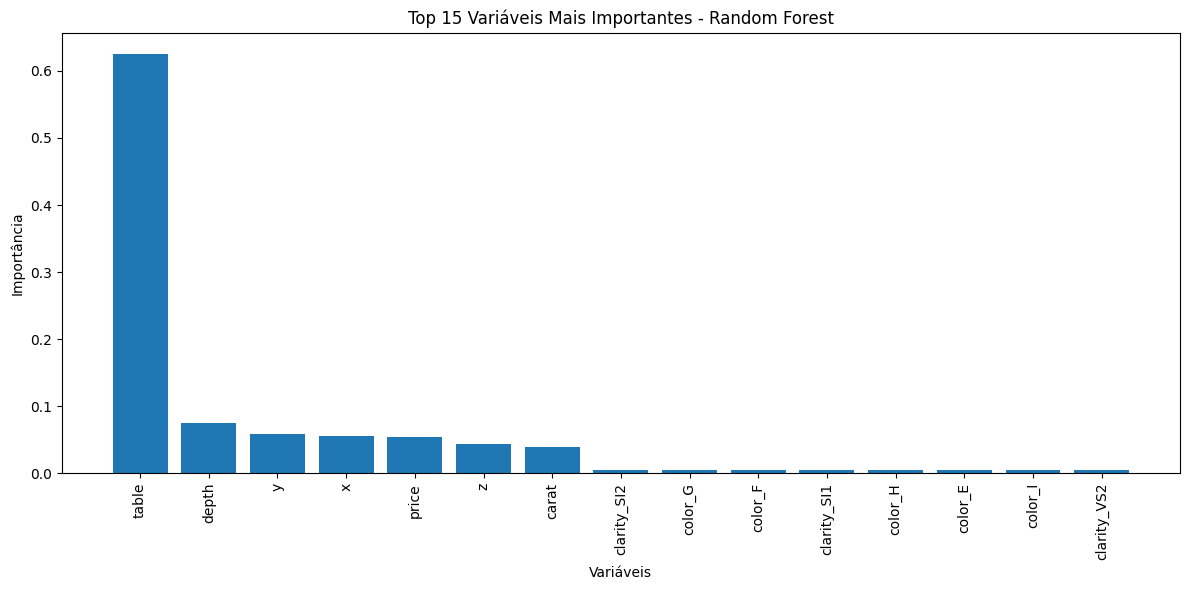

In [13]:
import numpy as np

# Calculando a importância das variáveis no modelo de Random Forest
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns

# Gerando o gráfico das 15 variáveis mais importantes (considerando as variáveis dummy)
plt.figure(figsize=(12, 6))
plt.title("Top 15 Variáveis Mais Importantes - Random Forest")
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=90)
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.tight_layout()
plt.show()

### Questão 14
Indique quais foram as três variáveis mais relevantes para o resultado final, na execução avaliada na questão 13. Justifique sua resposta.


$\Rightarrow$ As variáveis mais relevantes foram, pelo resultado da execução da questão 13, table, depth e y.

Podemos concluir que a variável table é a mais importante para determinar a qualidade do corte do diamante. Verificamos que as outras variáveis relacionadas às dimensões são importantes, mas não na mesma proporção que table.

O preço possui bastante importância, mas não ficou entre os três mais importantes. A claridade e a cor foram as variáveis que possuem importância bem baixa na classificação do corte do diamante.


### Questão 15
Novamente a partir do melhor modelo Random Forest indicado pelo GridSearch na questão 6, execute e aplique a técnica LIME em duas observações do conjunto de testes (escolha aleatoriamente).



Explicação para a 1ª observação (classe prevista = 0 ):
table > 0.50: 0.336
x > 0.77: 0.140
y > 0.74: -0.103
price > 0.36: -0.083
carat > 0.57: 0.070
color_I > -0.33: -0.035
clarity_IF <= -0.21: 0.033
clarity_VVS1 <= -0.29: 0.032
clarity_VVS2 <= -0.33: 0.023
-0.46 < depth <= 0.17: -0.023


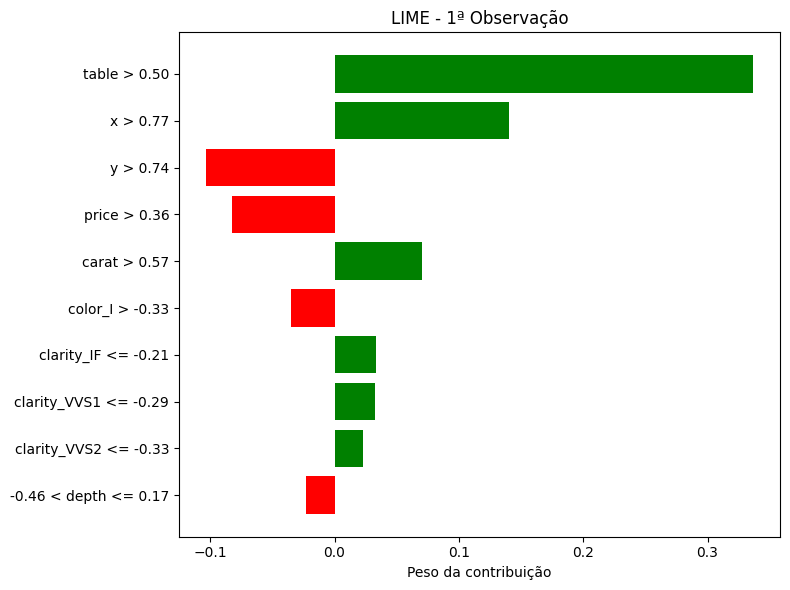


Explicação para a 2ª observação (classe prevista = 0 ):
table <= -0.54: -0.261
-0.18 < x <= 0.77: 0.054
clarity_IF <= -0.21: 0.045
-0.43 < price <= 0.36: -0.039
-0.17 < y <= 0.74: -0.038
clarity_VVS1 <= -0.29: 0.027
-0.33 < carat <= 0.57: 0.024
depth > 0.71: 0.021
color_I > -0.33: -0.017
color_H <= -0.43: 0.016


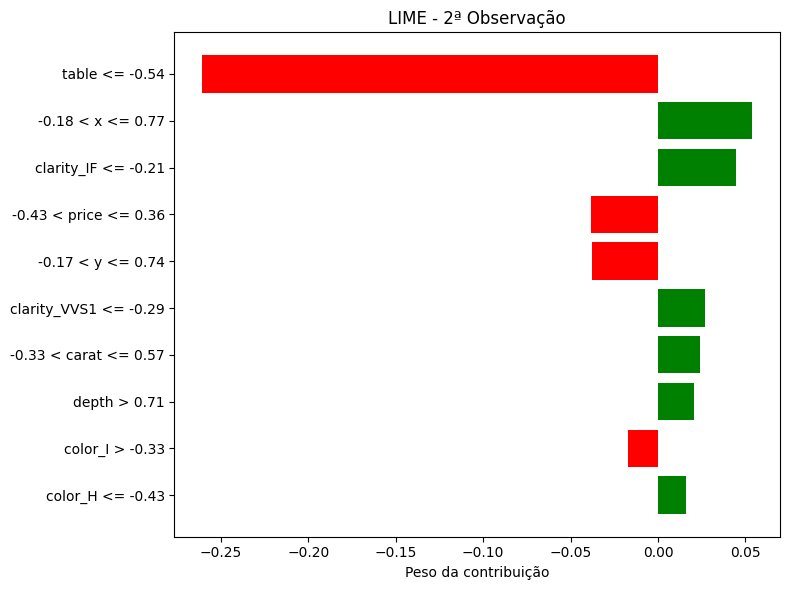

In [14]:
from lime.lime_tabular import LimeTabularExplainer

# Criando o explicador LIME
explainer = LimeTabularExplainer(
    training_data=feature_train,       # dados de treino escalonados
    training_labels=target_train,      # rótulos de treino
    feature_names=features.columns,    # nomes das variáveis
    class_names=["Ideal", "Premium", "Very Good", "Good", "Fair"], # nomes das classes
    discretize_continuous=True,
    mode="classification"
)

# Selecionando duas observações do conjunto de teste
instance1 = feature_test[3]
instance2 = feature_test[7]

# Explicação da primeira observação
exp1 = explainer.explain_instance(instance1, best_rf.predict_proba, num_features=10)
print("\nExplicação para a 1ª observação (classe prevista =", best_rf.predict([instance1])[0], "):")
for feat, weight in exp1.as_list():
    print(f"{feat}: {weight:.3f}")
exp1_list = exp1.as_list()
features1 = [f for f, _ in exp1_list]
weights1 = [w for _, w in exp1_list]
plt.figure(figsize=(8,6))
colors1 = ["green" if w > 0 else "red" for w in weights1]
plt.barh(features1, weights1, color=colors1)
plt.title("LIME - 1ª Observação")
plt.xlabel("Peso da contribuição")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Explicação da segunda observação
exp2 = explainer.explain_instance(instance2, best_rf.predict_proba, num_features=10)
print("\nExplicação para a 2ª observação (classe prevista =", best_rf.predict([instance2])[0], "):")
for feat, weight in exp2.as_list():
    print(f"{feat}: {weight:.3f}")
exp2_list = exp2.as_list()
features2 = [f for f, _ in exp2_list]
weights2 = [w for _, w in exp2_list]
plt.figure(figsize=(8,6))
colors2 = ["green" if w > 0 else "red" for w in weights2]
plt.barh(features2, weights2, color=colors2)
plt.title("LIME - 2ª Observação")
plt.xlabel("Peso da contribuição")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Questão 16
Apresente as variáveis das observações escolhidas na questão 15, indique os dois fatores que mais influenciaram na classificação de cada uma das observações e interprete o resultado da aplicação da técnica LIME nestas mesmas observações.


$\Rightarrow$ Os dois fatores que mais influenciam na classificação, para ambos os casos, foram o table e x. Na primeira observação, o valor de table influencia positivamente, enquanto na segunda influencia negativamente. O valor de x influencia positivamente tanto para a primeira quanto para a segunda observação.

Temos como resultado, pela explicação do LIME, que mesmo valores de variáveis que resultam em previsões negativas (i.e., ramos da árvore que indicam para previsões incorretas), não necessariamente resultam em previsão negativa quando as outras variáveis são consideradas.